In [1]:
import urllib.request
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

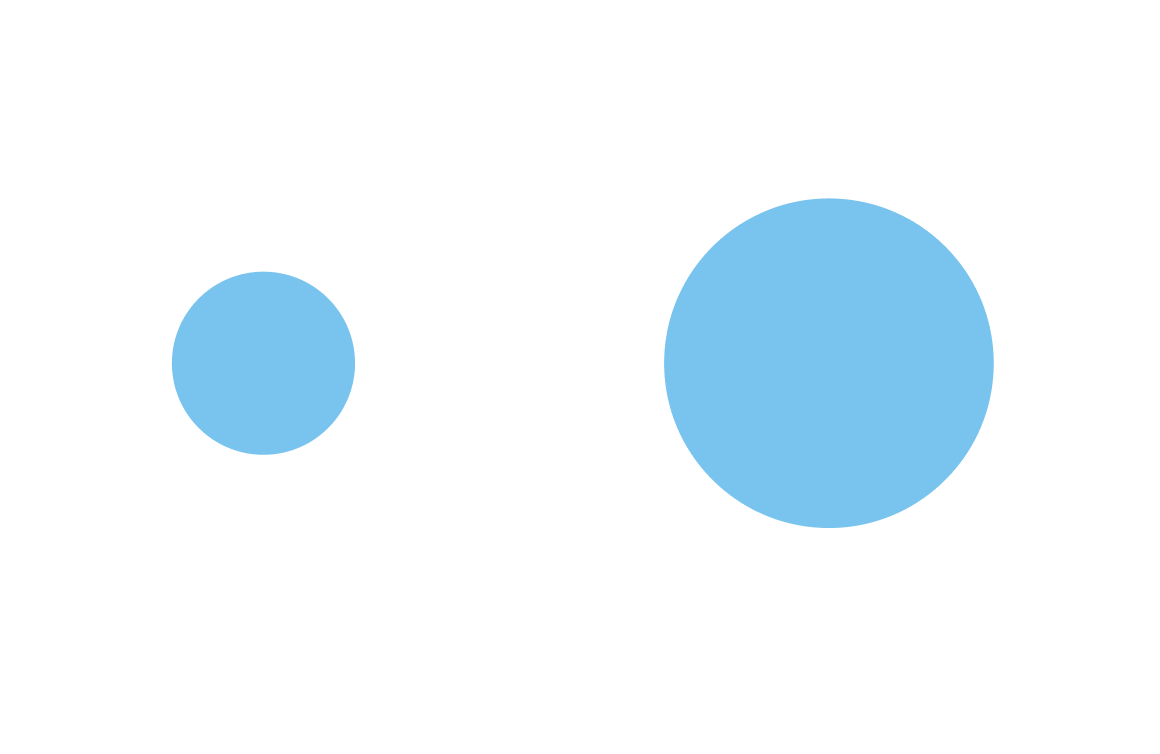

In [2]:
image_url = "https://i.postimg.cc/KcJRdhRf/Namal.png"

image_path, _ = urllib.request.urlretrieve(image_url)

image = cv2.imread(image_path)

cv2_imshow(image)

In [3]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=25):

    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

In [4]:
def otsu_threshold(image):

    # Convert the input image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding algorithm
    _, thresholded = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return thresholded

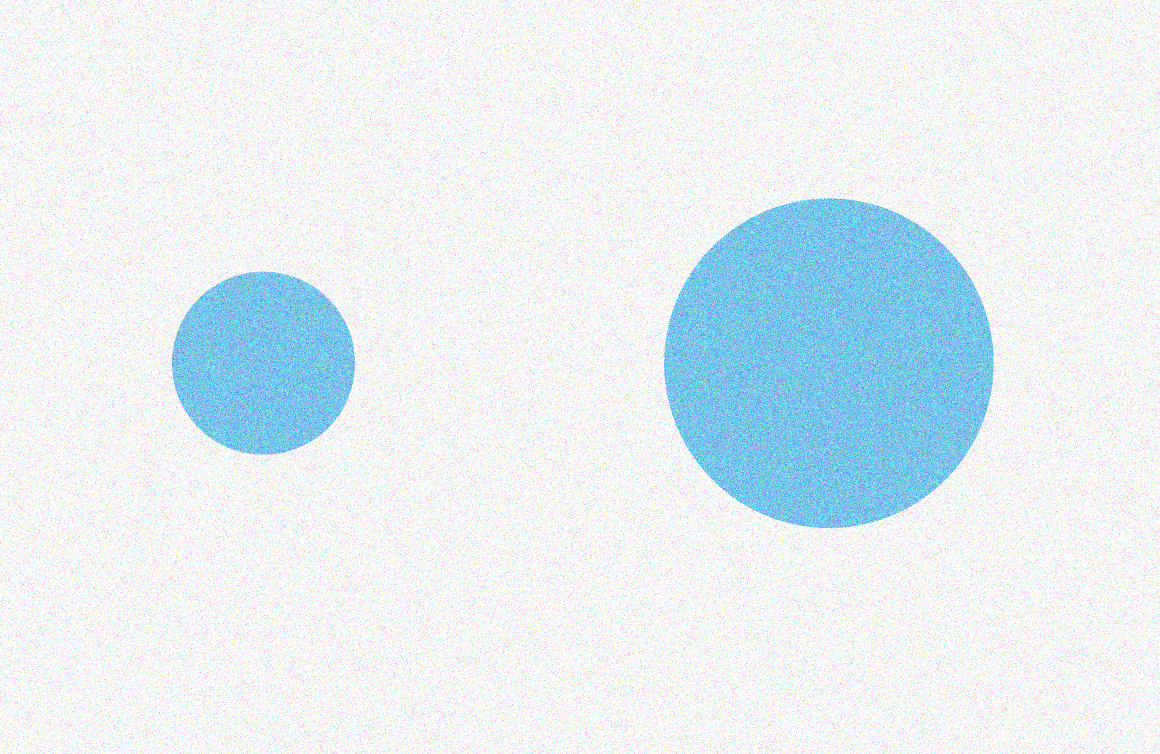

In [5]:
# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image)
cv2_imshow(noisy_image)

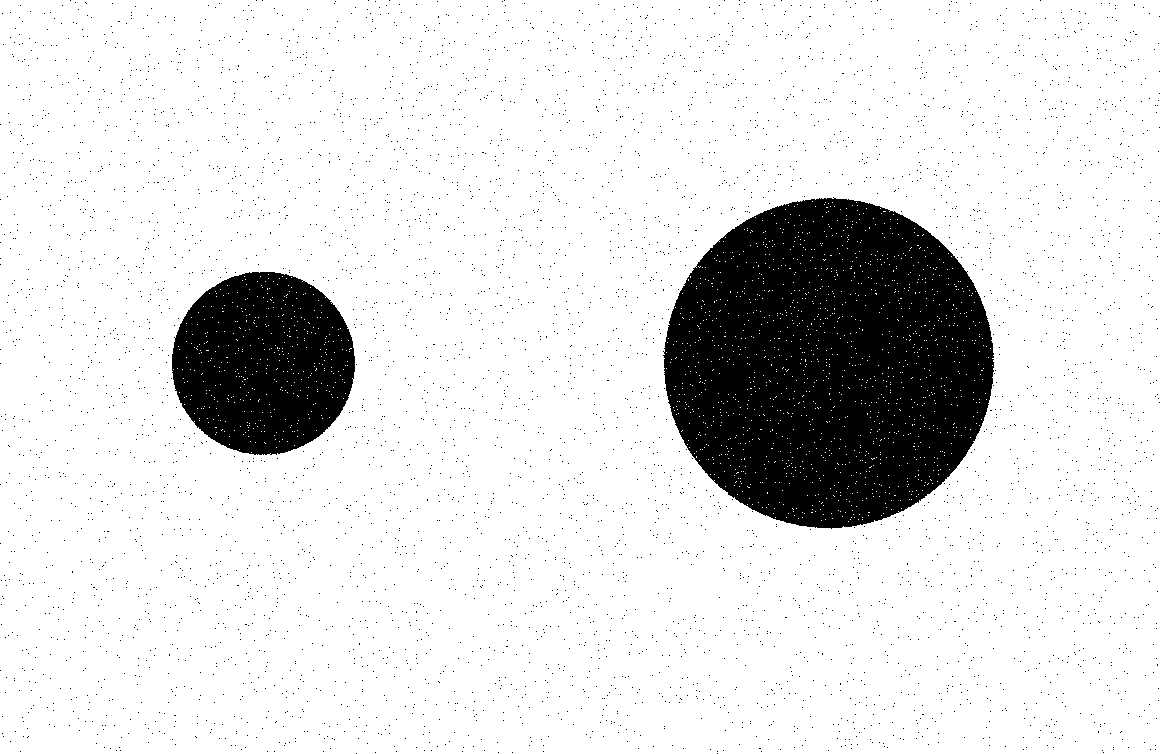

In [6]:
# Apply Otsu's algorithm for thresholding
otsu_image = otsu_threshold(noisy_image)
cv2_imshow(otsu_image)

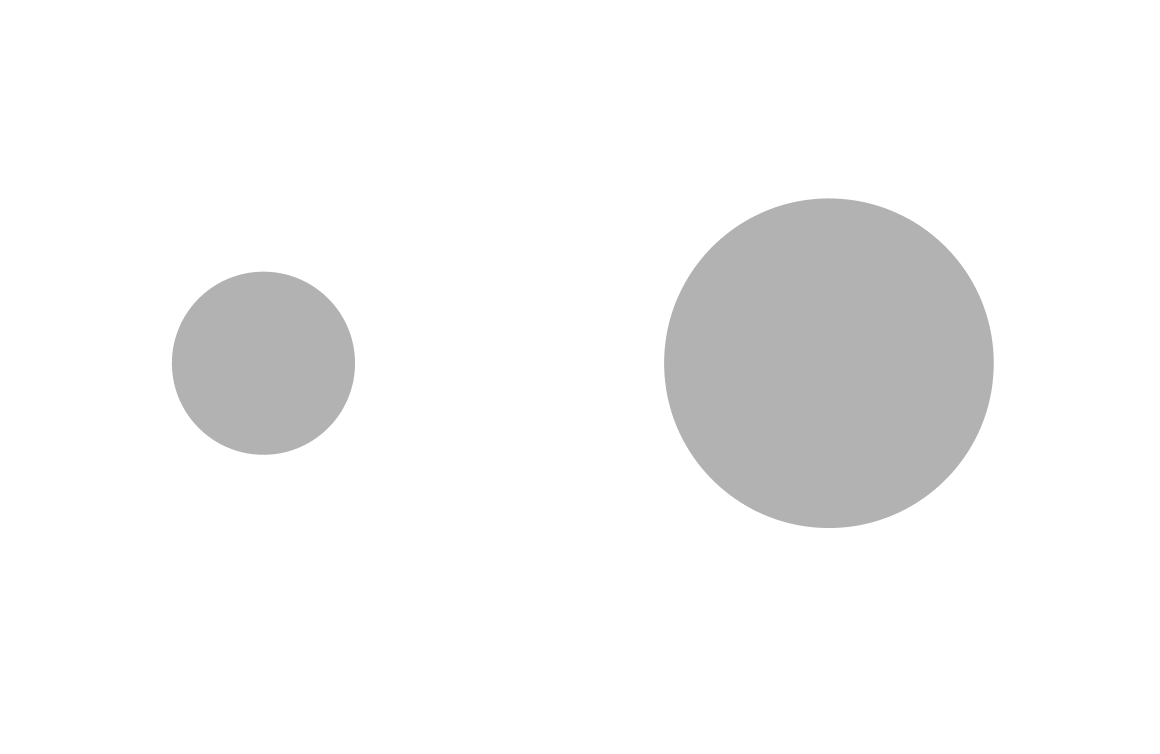

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [8]:
def region_growing(image, seeds, threshold):
    # Create a binary mask to mark visited pixels
    visited = np.zeros_like(image, dtype=np.uint8)

    # Initialize segmented image
    segmented_image = np.zeros_like(image, dtype=np.uint8)

    # Define neighbor coordinates (8-connectivity)
    neighbors = [(x, y) for x in range(-1, 2) for y in range(-1, 2) if not (x == 0 and y == 0)]

    # Perform region growing
    while seeds:
        current_seed = seeds.pop(0)
        x, y = current_seed
        segmented_image[x, y] = 255
        # Visit neighbors
        for dx, dy in neighbors:
            nx, ny = int(x + dx), int(y + dy)  # Ensure nx and ny are integers
            # Check if neighbor is within image boundaries
            if 0 <= nx < image.shape[0] and 0 <= ny < image.shape[1]:
                if visited[nx, ny] == 0 and abs(int(image[nx, ny]) - int(image[x, y])) <= threshold:
                    segmented_image[nx, ny] = 255
                    visited[nx, ny] = 1
                    seeds.append((nx, ny))

    return segmented_image


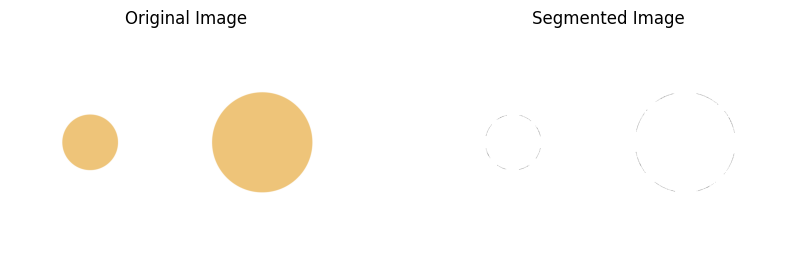

In [9]:
# Define seed points
seeds = [(100, 100),(200,200)]

# Set threshold for region growing
threshold = 15

# Perform region growing segmentation
segmented_image = region_growing(gray_image, seeds, threshold)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()